# Data Visualitation 

In [1]:
#Importing all the libraries to use in the manage of data
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from math import pi
from textwrap import wrap
from collections import Counter
import pandas_profiling
from mpl_toolkits import mplot3d
import seaborn as sns

In [2]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

## Comparison Graph 
Uses for:
* Among Items (Two variables, Many categories or Fer categories)
* Over Time (Many Peridos or Fer periods)

### 1. Column Charth




In [3]:
# import the first dataset to use
file = 'RdatosTFM.txt'
datapib = pd.read_csv(file, sep = '\s+')
data = datapib['Year']
b = datapib['PIB']
# sort the values from least to greatest
result = datapib.groupby(["Year"])['PIB'].aggregate(np.median).reset_index().sort_values('PIB')

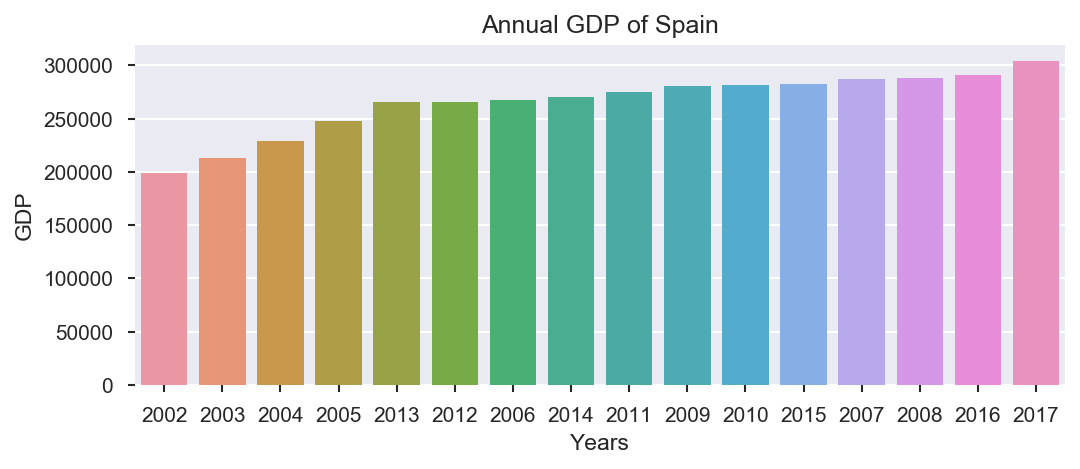

In [4]:
#Size and dpi
plt.figure(figsize = (8,3), dpi = 150)
#Ploting the graph
sns.barplot(data, b, order = result['Year'], orient = "v")
#Title
plt.title('Annual GDP of Spain')
#Labels
plt.xlabel('Years')
plt.ylabel('GDP')

plt.show(); 

In [5]:
suicides = pd.read_csv("master.csv")
suicides.drop(columns=["age", "suicides/100k pop", "HDI for year","gdp_per_capita ($)"], inplace=True)
suicides = suicides.groupby(["generation", "sex"]).sum()
suicides.reset_index(inplace=True)
female = suicides.loc[suicides.sex == "female"]
male = suicides.loc[suicides.sex == "male"]

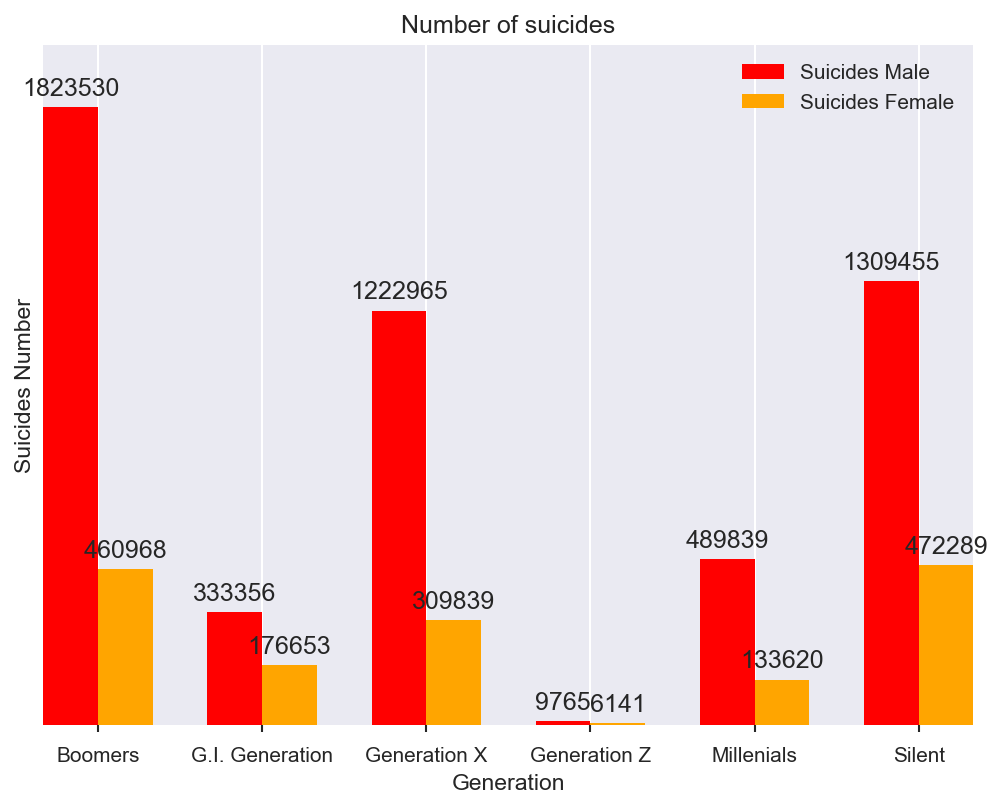

In [6]:
#The data
smale = male.suicides_no
sfemale = female.suicides_no
index = np.arange(len(male.generation))
#Calculate optimal width
width = np.min(np.diff(index))/3
fig = plt.figure(figsize=(8,6), dpi=150)
ax = fig.add_subplot(111)
b1=ax.bar(index-width,smale,width,label='Suicides Male', color="red")
b2=ax.bar(index,sfemale,width,label='Suicides Female', color="orange")
ax.legend()
ax.set_xticks(index - width / 2)

ax.set_title("Number of suicides")
ax.set_xlabel('Generation')
ax.set_ylabel("Suicides Number")
plt.yticks([])
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
                                
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
autolabel(b1)
autolabel(b2)
label = male.generation
ax.set_xticklabels(label)
plt.margins(0,.1)

plt.show()

Comparing the amount of male and female who made suicide by generations 

### 2. Table with Embedded Charts 

<Figure size 900x600 with 0 Axes>

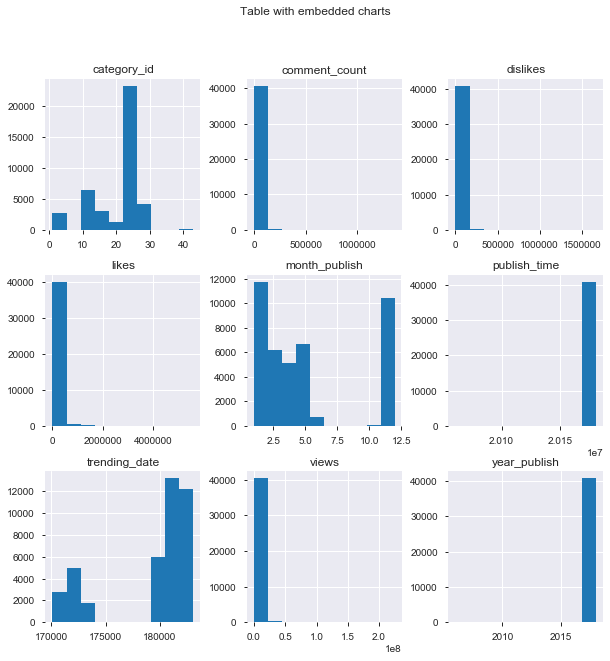

In [7]:
file="USvideos.csv"
u=pd.read_csv(file, encoding="latin-1")
vus=u
vus= vus.drop(columns=['title', 'channel_title', 'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'])
vus.columns=vus.columns.str.replace(" ","_")
vus['publish_time']=vus['publish_time'].str.replace("-","")
vus['trending_date']=vus['trending_date'].str.replace(".","").astype(int)
vus['publish_time']=vus['publish_time'].str.slice(start=0, stop=8).astype(int)
vus['category_id']=vus['category_id'].astype(int)
vus['publish_time']=vus['publish_time'].astype(int)
vus['year_publish']=vus['publish_time'].astype(str).str.slice(start=0, stop=4).astype(int)
vus['month_publish']=vus['publish_time'].astype(str).str.slice(start=4, stop=6).astype(int)
plt.figure(dpi=150)
#take the params of the dataset (USvideos)
plt.rcParams['figure.figsize']=(10,10)
#selecting the dataframe
vus.hist()
#titple
plt.suptitle("Table with embedded charts")
plt.show()

### 3. Bar Chart 

In [8]:
#Importing file
amazon = pd.read_csv("amazon.csv", encoding="latin")
#Chaging the values to int
amazon.number = amazon.number.astype(int)
#Choosing Useful Columns
fires = amazon[["state", "number"]]
#Grouping by labes and sum all 
fires =fires.groupby(by="state").sum()
#Reseting index
fires.reset_index(inplace=True)
#Sorting the values
fires = fires.sort_values("number")
#Reseting again
fires = fires.reset_index(drop=True)
#pd.options.display.float_format = '{:.2f}'.format
fires.head()


,state,number
0,Sergipe,3237
1,Distrito Federal,3561
2,Alagoas,4644
3,Espirito Santo,6546
4,Acre,18452


<Figure size 1500x1500 with 0 Axes>

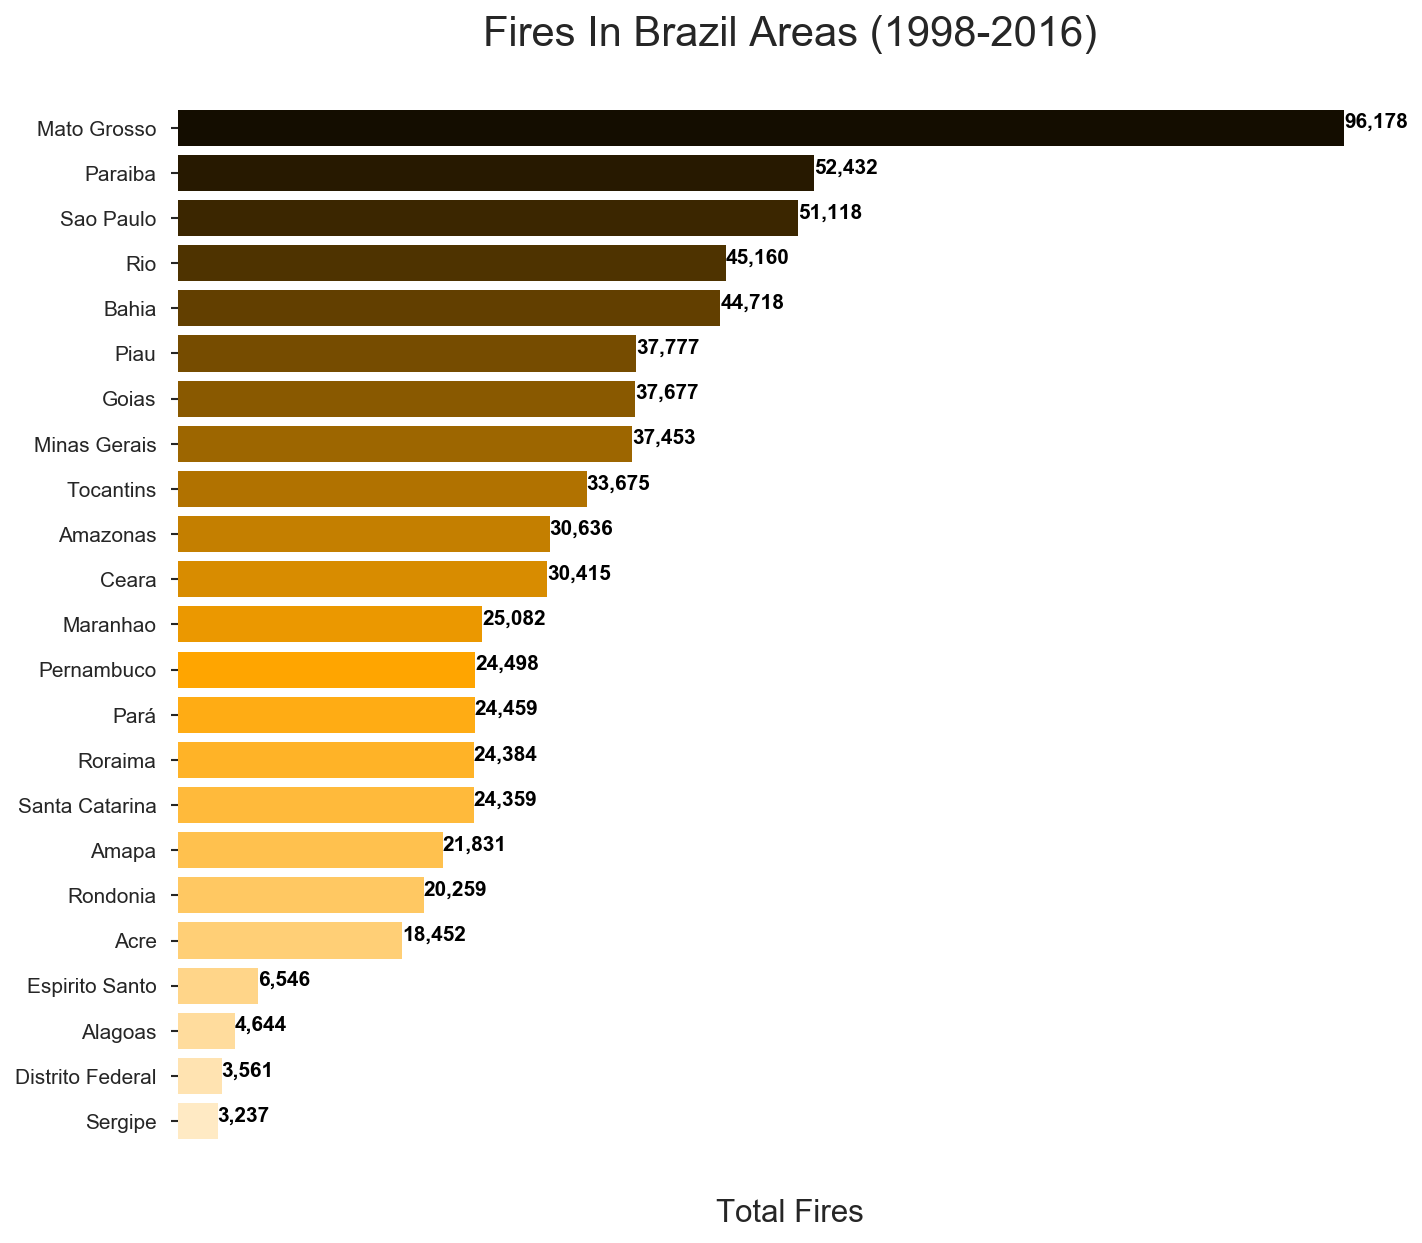

In [9]:
#General dpi of the figure
plt.figure(dpi=150)
#Color for the graph
paleta = ["#140d00", "#271900", "#3b2600", "#4e3300", "#623f00", "#764c00", "#895900", "#9d6600", "#b17200", "#c47f00", "#d88c00", "#eb9800", "#ffa500", "#ffac14", "#ffb327", "#ffba3b", "#ffc14e", "#ffc862", "#ffcf76", "#ffd589", "#ffdc9d", "#ffe3b1", "#ffeac4"]
paleta.reverse()
#Allowing suboplots with specific size and dpi
fig, ax = plt.subplots(figsize=(12,10),dpi=150);
#Title
plt.title("Fires In Brazil Areas (1998-2016)", fontsize=20);
#Plotting bars
ax.barh(fires.state,fires.number, color = paleta);
#Deleting xticks
plt.xticks([]) ;
#Deleting the box of the graph 
plt.box(False);
plt.xlabel("Total Fires", fontsize=15)
#ax.spines['bottom'].set_visible(False)
#Fixing and putting the values over the graphs
for i, v in enumerate(fires.number):
    ax.text(v, i, f'{v:,}'.replace('.', ','), color="black", fontweight='bold')
#Fixing the space in the labels     
plt.subplots_adjust(left=0.22, hspace=.8)
#ax.yaxis.set_ticks_position('none') fontweight='normal', ha='left', ,  va='center'
plt.show();

Watching total amount of fires happened in Areas of brazil since 1998 to 2016

### 4. Columns Chart

Text(0, 0.5, 'Frequency')

<Figure size 1500x1200 with 0 Axes>

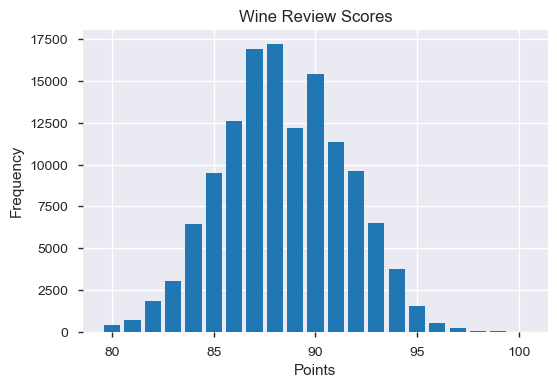

In [10]:
# Read data sets
wine_reviews = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
# create a figure and axis
plt.figure(figsize=(10,8),dpi=150)
fig, ax = plt.subplots(figsize=(6,4),dpi=100) 
# count the occurrence of each class 
data = wine_reviews['points'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Wine Review Scores') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')


### 5. Circular Area Chart

In [11]:
#Reading dataset
df= pd.read_csv('Extraccion_materiales.csv')


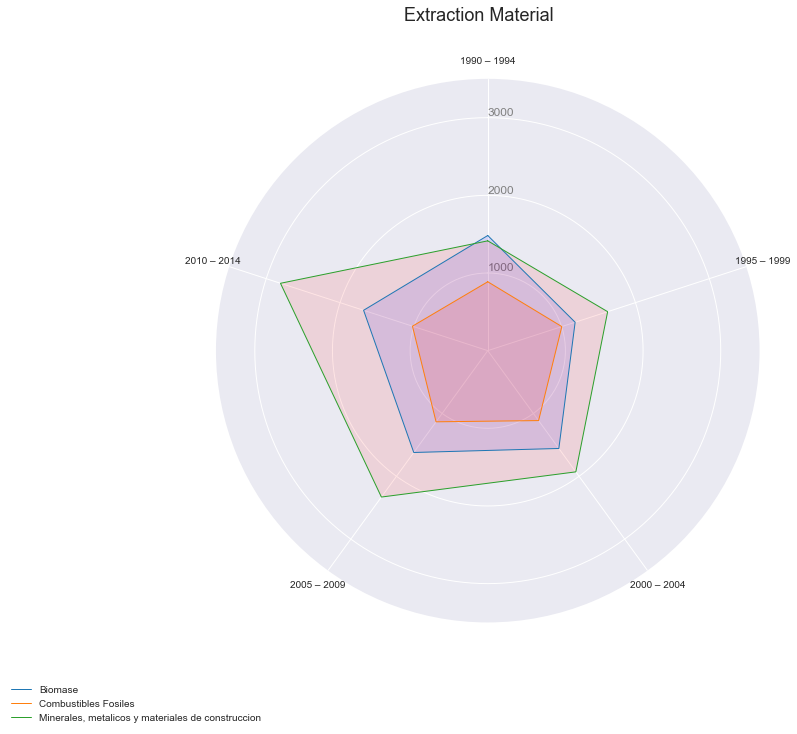

In [12]:
#Getting interval of years
categories=list(df)[1:]
#lengh of the total elements
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
#Values of the angles
angles += angles[:1]
#plt.figure(figsize=(12,10))
#plt.subplots(dpi=100, figsize=(6,4))
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1000,2000,3000], ["1000","2000","3000"], color="grey", size=12)
plt.ylim(0,3500)

# Add plots note: No more than 3 because those become not legible
plt.suptitle('Extraction Material', fontsize=18)
# Ind1

values=df.loc[0].drop('TIPO_DE_MATERIAL').values.flatten().tolist()
values += values[:1]
#Ploting the part of the graph
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Biomase")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('TIPO_DE_MATERIAL').values.flatten().tolist()
values += values[:1]
#Ploting 
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Combustibles Fosiles")
ax.fill(angles, values, 'r', alpha=0.1)

 
# Ind3
values=df.loc[2].drop('TIPO_DE_MATERIAL').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Minerales, metalicos y materiales de construccion")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, -0.1))

We can see the density of the materials according to quantity and years. In the last years ("2010 - 2014"), for the green tag, the extraction was most and  less  in the ("1990 - 1994") period.
For the orange tag, the extraction was most in the periods ("2000 - 2004", "2005 - 2009") and less in the last period ("2010 - 2014")

### 6. Line Chart

In [13]:
# import the first dataset to use
file = 'RdatosTFM.txt'
datapib = pd.read_csv(file, sep = '\s+')
# we sort the values of the PIB
datapib['PIB'].sort_values(ascending = False)
x = datapib['Paro_Total']
data = datapib['Year']

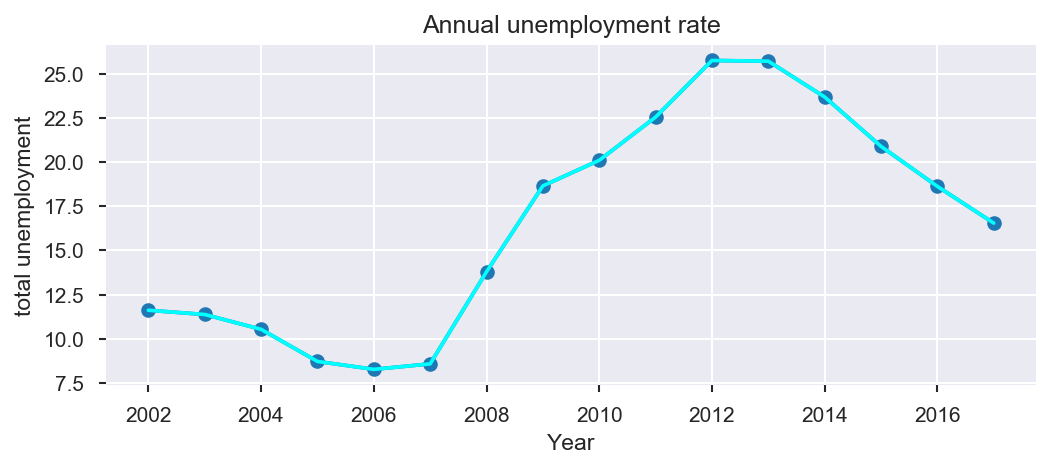

In [14]:
# show the graph
#Ploting the points
plt.figure(dpi=150, figsize=(8,3))
plt.plot(data, x, marker = 'o' ,linestyle = '-')
plt.plot(data, x, color = 'cyan')
#Title
plt.title('Annual unemployment rate')
#Labels
plt.ylabel('total unemployment')
plt.xlabel('Year')
plt.show();

In this graph you can see the annual unemployment in Spain, it can be appreciated that in 2006 there was a low unemployment rate but that from 2007 began to see an exponential increase until 2013 that began to have a decrease.

### 7. Column Chart

In [15]:
#get the data from the dataset
c = pd.read_csv('Cities.csv')
#Drop columns
cities=c.drop(columns=['Unnamed: 0'])
#sorting by year
year = 2018
by_year = (cities[cities['year'].eq(year)]
       .sort_values(by='value', ascending=True)
       .head(10))
#invert the values of the top to the bottom
by_year = by_year[::-1]

Text(1, 0.4, '2018')

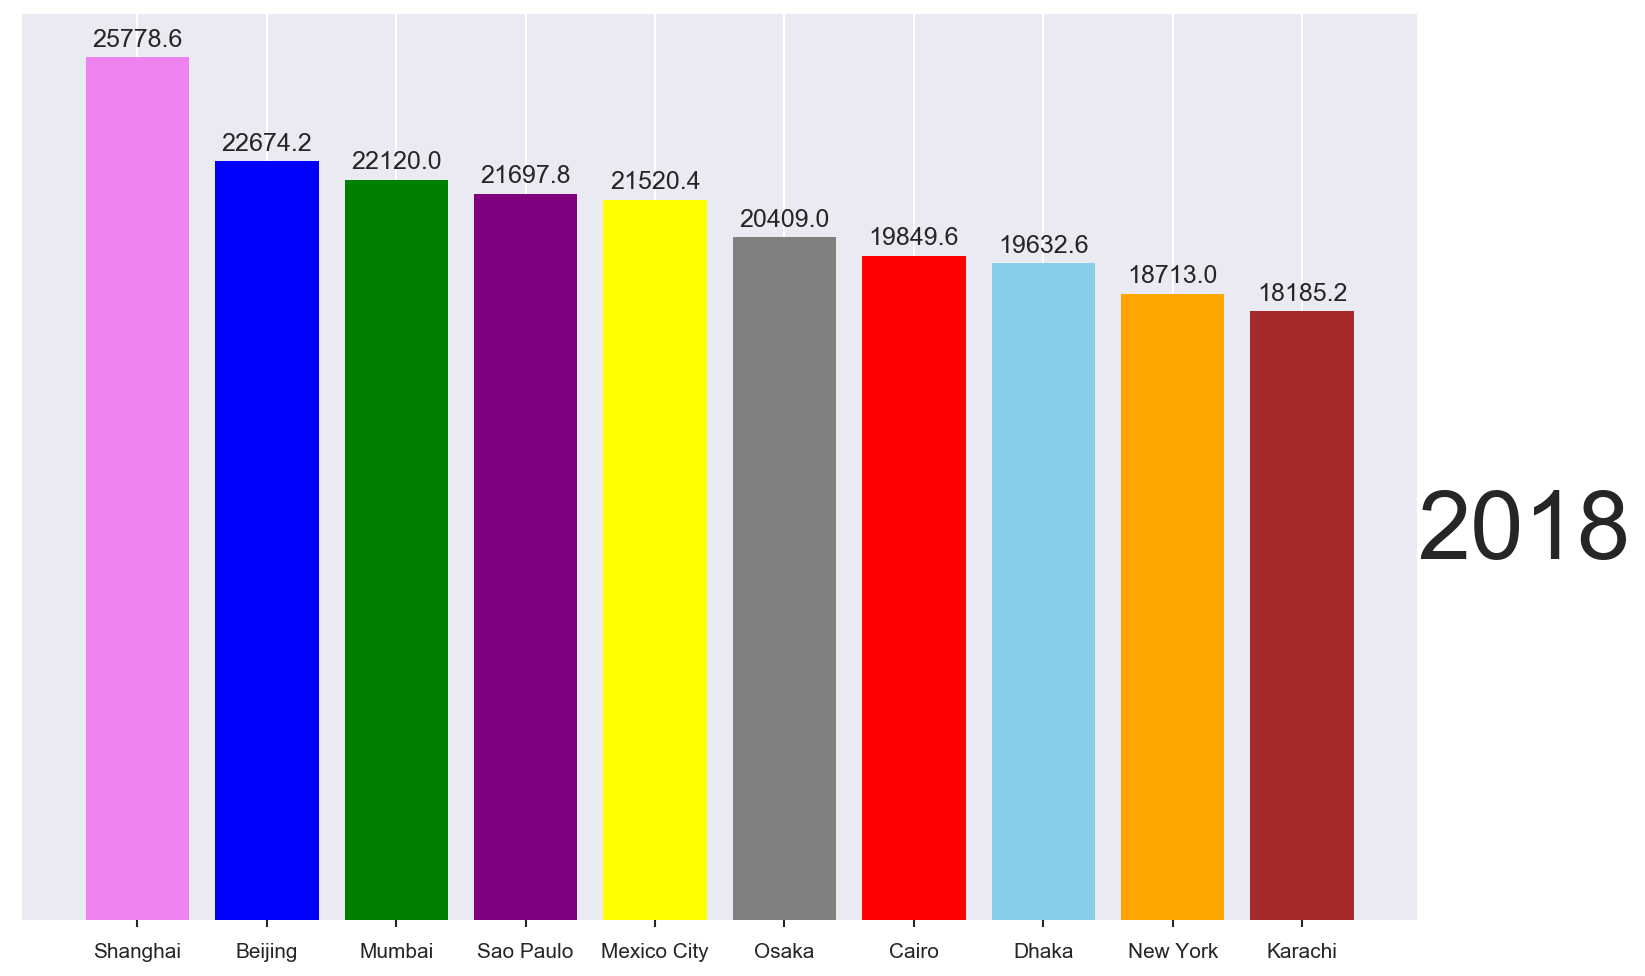

In [16]:
#make the plot and give it size and color
fig, ax = plt.subplots(figsize=(12, 8), dpi=150)
c = ax.bar(by_year['name'], by_year['value'], color=['violet','blue','green','purple','yellow','grey','red','skyblue','orange', 'brown'])
plt.yticks([])
#showing the current year
autolabel(c)

ax.text(1, 0.4, year, transform=ax.transAxes, size=46, ha='left')

### 8. Line Chart 

In [17]:
#Reading csv
suicides = pd.read_csv("master.csv")
#Choosing useful columns
suicides.drop(columns=["age", "suicides/100k pop", "HDI for year","gdp_per_capita ($)"], inplace=True)
#Grouping by tear and sex and sum all 
suicides = suicides.groupby(["year", "sex"]).sum()
#Reset index
suicides.reset_index(inplace=True)
#Dividing the data set in two ""<female and make>""
female = suicides.loc[suicides.sex == "female"]
male = suicides.loc[suicides.sex == "male"]

<Figure size 600x300 with 0 Axes>

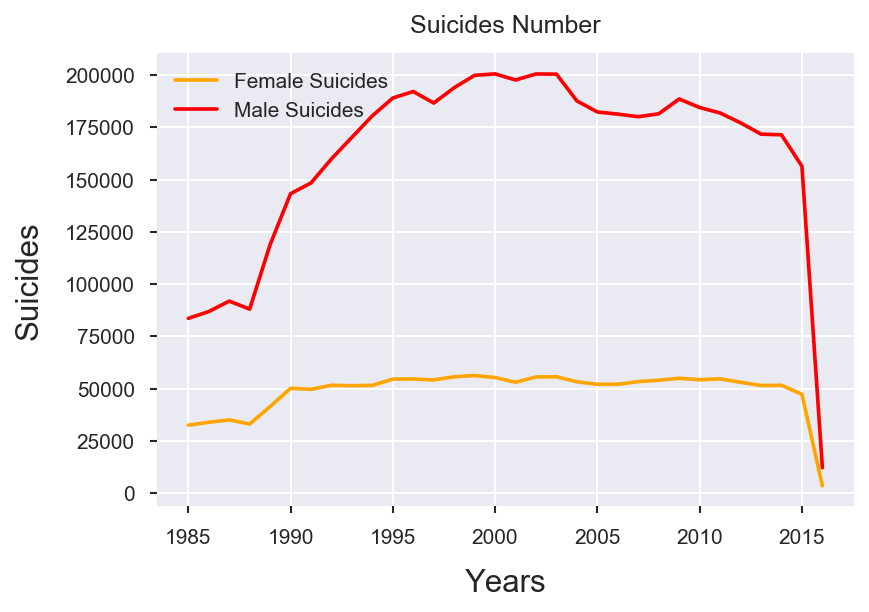

In [18]:
plt.figure(figsize=(4,2),dpi=150);
#Subplots with fize of them, sharing the same axis "X" and dpi 
fig,ax= plt.subplots(figsize= (6,4),sharex=True, dpi=150);
#Title 
plt.title("Suicides Number", pad=10);
#Ploting both graphs
ax.plot(female.year, female["suicides_no"], color = "orange", label="Female Suicides");
ax.plot(male.year, male["suicides_no"], color="red", label= "Male Suicides");
#Adding Legend with specific position
ax.legend(loc="upper left")
#Modification the label, labelpad (separation)  and size of the labels
ax.set_ylabel("Suicides",labelpad=10, fontsize=15)
ax.set_xlabel("Years", labelpad =10, fontsize=15)
#plt.ylabel("Suicides", fontsize=50)
plt.show();

Amount of suicides for male and female since 1985 until 2015

## Distribution 

* Single data (Few Data Point or Many data Point)
* Two variables
* Three variables

### 1. Column Histogram 

There aren’t any required arguments but we can optionally pass some like the bin size.

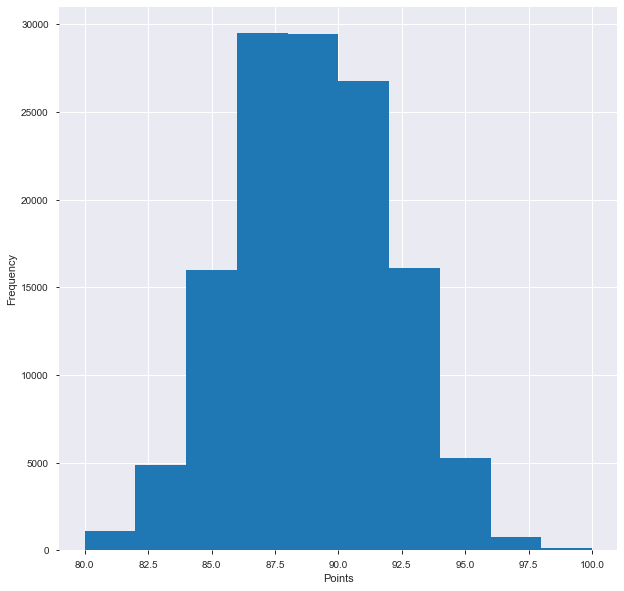

In [19]:
wine_reviews = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
wine_reviews['points'].plot.hist()
ax.set_title('Wine Review Scores')
plt.xlabel("Points")
plt.show()

### 2. Line Histogram 

In [20]:
df2 = pd.read_csv('Extraccion.csv')
sort = df2.sort_values([ 'TIPO_DE_MATERIAL', 'EXTRACCION_(MILES_DE_TONELADAS)'], ascending=[True, False])

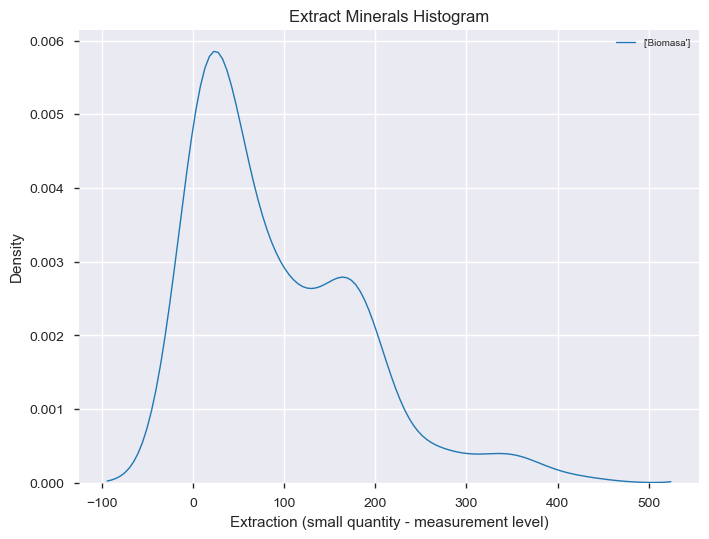

In [21]:
#List of types of materials to show
plt.figure(figsize=(8,6), dpi=100)
tipos = ['Biomasa']
# Iterate through the types of materials
#for tipo in tipos:
    # Subset to the df
 #   subset = sort[sort['TIPO_DE_MATERIAL'] == tipo]
    
    # Draw the density plot
sns.distplot(sort['EXTRACCION_(MILES_DE_TONELADAS)'], hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = tipos)
# Labels    
plt.legend(prop={'size': 7})
plt.title('Extract Minerals Histogram'); 
plt.xlabel('Extraction (small quantity - measurement level)')
plt.ylabel('Density');

This is only plot to show that we can also plot more than one Line Histogram

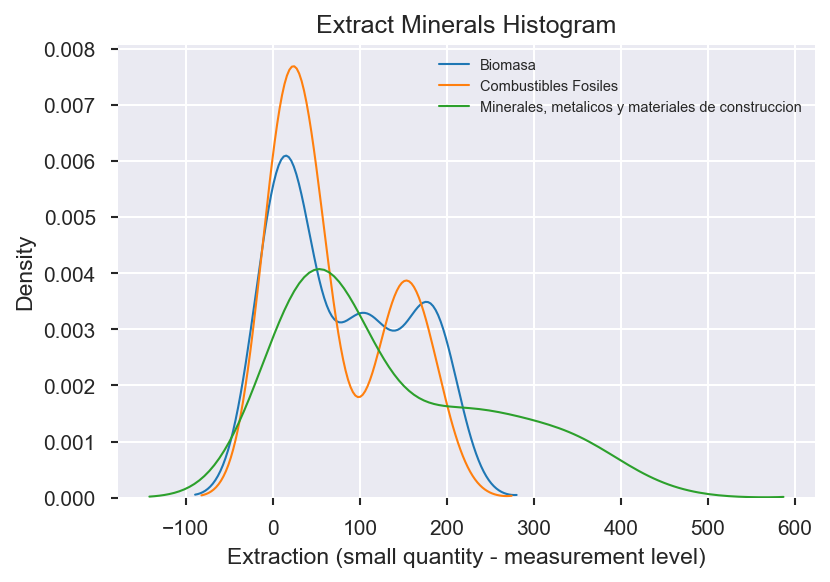

In [22]:
#List of types of materials to show
tipos = ['Biomasa', 'Combustibles Fosiles', 'Minerales, metalicos y materiales de construccion']
plt.figure(figsize=(6,4),dpi=150)
# Iterate through the types of materials
for tipo in tipos:
    # Subset to the df
    subset = sort[sort['TIPO_DE_MATERIAL'] == tipo]
    
    # Draw the density plot
    sns.distplot(subset['EXTRACCION_(MILES_DE_TONELADAS)'], hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = tipo)
# Labels    
plt.legend(prop={'size': 7})
plt.title('Extract Minerals Histogram'); 
plt.xlabel('Extraction (small quantity - measurement level)')
plt.ylabel('Density');

### 3. Scatter Chart

In [23]:
# show the dataset
countries = pd.read_csv('countries.csv')
# generate a new dataset with the countries of the year 2007
a = countries[countries.year == 2007]
# separte the continent Africa of the 2007
rip = a[(a.continent == 'Africa')] 
# the same before, but with Europe
rip2 =  a[(a.continent == 'Europe')] 
# the two different dataframes are joined
chale = rip.append(rip2)

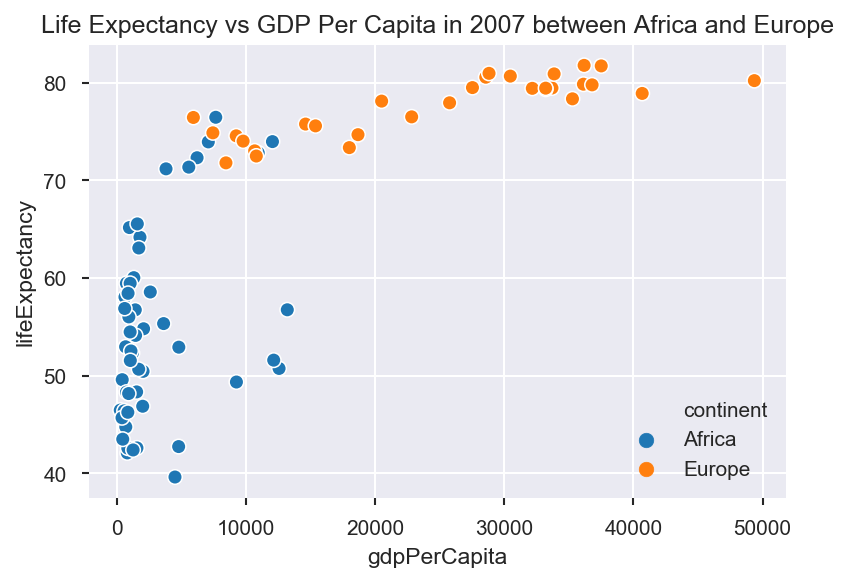

In [24]:
# show the graph
plt.figure(figsize = (6,4), dpi=150)
sns.scatterplot(x= chale['gdpPerCapita'], hue = 'continent', y= chale['lifeExpectancy'], data=chale)
plt.title('Life Expectancy vs GDP Per Capita in 2007 between Africa and Europe')
plt.show()

In this graph you can see the life expectancy versus the GDP per capita of the continents of Europe and Africa.
it can be seen that the data of the African continent tends to have a lower GDP per capita and a worse life expectancy compared to Europe, which has higher levels and even one or other atypical data.

### 4. 3D Area Chart

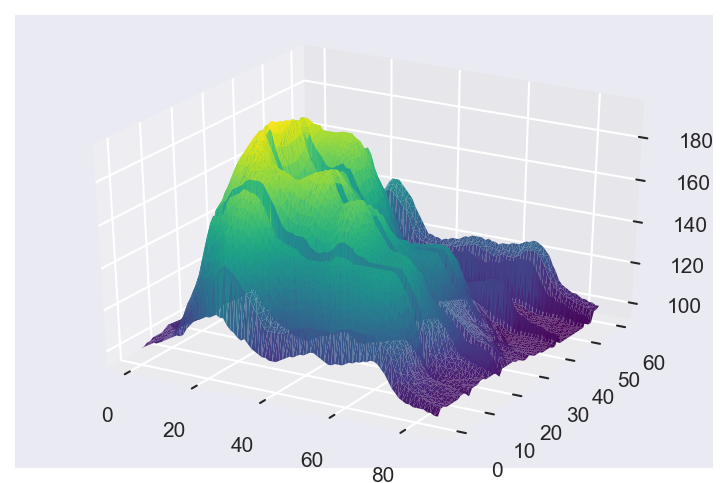

In [25]:
#get the dataset (I have to search a dataset special to do this)
v = pd.read_csv('GeoVol.csv')
 
# Make the plot
fig = plt.figure(figsize=(6,4),dpi=150)
#make it 3d
ax = fig.gca(projection='3d')
#give it the params and give it color
ax.plot_trisurf(v['Y'], v['X'], v['Z'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()

## Composition 
* Static (Simple share of total, Acumulation of Substraction to total, Component of Components)
* Changing Over: Time Few Periods:Differences Matter "Relative and Relative and Absolute", Many periods: The same criterias


### 1. Stocked 100% Column Chart


In [26]:
# Read data sets
weeks = pd.read_csv('weeks.txt', index_col=0)

<Figure size 1500x1500 with 0 Axes>

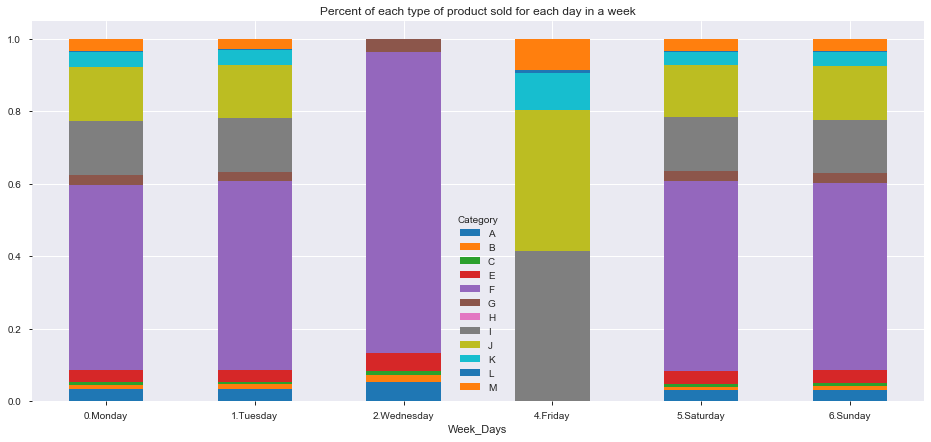

In [27]:
PerDayCat = weeks.pivot_table(values=['Total_Products_Sold'], 
                      index='Week_Days',
                      columns='Category',
                      aggfunc='sum')
plt.figure(dpi=150)
PerDayCat.columns = PerDayCat.columns.droplevel()
PerDayCat = PerDayCat.div(PerDayCat.sum(1), axis=0)
PerDayCat.plot(kind='bar', stacked=True, figsize = [16, 7], rot=0, title = "Percent of each type of product sold for each day in a week")

### 2. Stocked Column Chart

In [28]:
#Reading Dataset
scores = pd.read_csv("scores.csv")
#Choosing only usefulcolumns
scores = scores[["School Name", "Average Score (SAT Math)", "Average Score (SAT Reading)", "Average Score (SAT Writing)"]]
#Deleting missing values
scores.dropna(inplace=True)
#Rest index
scores.reset_index(inplace=True, drop=True)
#Renaming the columns names
names = {"School Name":"school_name", "Average Score (SAT Math)":"math_average", "Average Score (SAT Reading)":"reading_average", "Average Score (SAT Writing)":"writing_average"}
scores.rename(columns = names, inplace=True)
#Using only values to avoid make the stocked so bad
scores = scores.iloc[:8]


<Figure size 864x288 with 0 Axes>

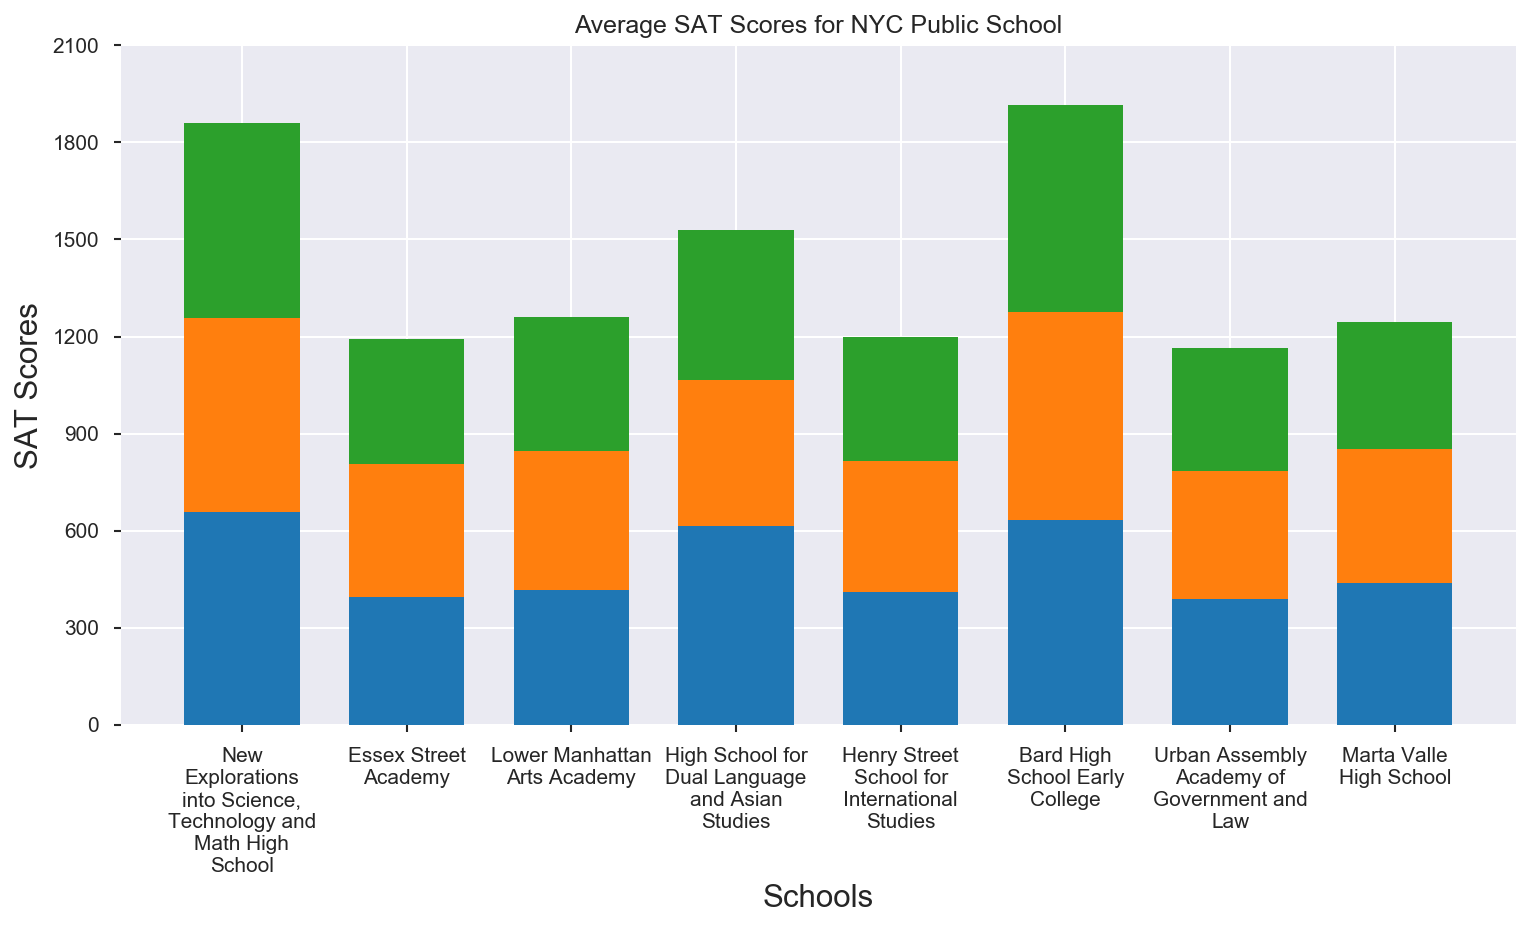

In [29]:
#Size
plt.figure(figsize=(12,4))
fig, ax = plt.subplots(figsize=(12, 6), dpi=150)
#Number of elements
index = np.arange(len(scores.school_name))
#Names to replace later
names = scores.iloc[:,0]
#Getting values by columns
math = scores.math_average
reading = scores.reading_average
writing = scores.writing_average
#Ploting bar
ar=ax.bar(x=index, height=math, width=0.70)
#Ploting the bard and add to the first
br=ax.bar(x=index, height=reading, width=0.70, bottom =math)
#ploting the thrid with the sum of the two before graphs
cr=ax.bar(x=index, height=writing, width=0.70, bottom =reading+math)
#Labels wih specific size
plt.xlabel('Schools', fontsize=15)
plt.ylabel('SAT Scores', fontsize=15)
#Renaming the numbs by names
names = ['\n'.join(wrap(name, 15)) for name in names]
#Showing ticks
plt.xticks(index, names)
#Seting the positions
plt.yticks(np.arange(0, 2400, 2400/len(index)))
#TITLE
plt.title('Average SAT Scores for NYC Public School')

plt.show()


### 3. Stocked 100% Area Chart 

In [30]:
#Reading the data set and Encoding 
file="USvideos.csv"
u=pd.read_csv(file, encoding="latin-1")
#polish the data set tu be easy to use
vus=u
#Droping columns
vus= vus.drop(columns=['title', 'channel_title', 'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'])
#Removing spaces
vus.columns=vus.columns.str.replace(" ","_")
#Deleting sign not usefuls
vus['publish_time']=vus['publish_time'].str.replace("-","")
#Converting data type
vus['trending_date']=vus['trending_date'].str.replace(".","").astype(int)
#Getting specific part of the string and convertiong to int
vus['publish_time']=vus['publish_time'].str.slice(start=0, stop=8).astype(int)
#Converting types
vus['category_id']=vus['category_id'].astype(int)
vus['publish_time']=vus['publish_time'].astype(int)
#Converting string and types
vus['year_publish']=vus['publish_time'].astype(str).str.slice(start=0, stop=4).astype(int)
vus['month_publish']=vus['publish_time'].astype(str).str.slice(start=4, stop=6).astype(int)

In [31]:
vus1=vus
vus1['category_name'] = np.nan

vus1.loc[(vus1["category_id"] == 1),"category_name"] = 'Film and Animation'
vus1.loc[(vus1["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
vus1.loc[(vus1["category_id"] == 10),"category_name"] = 'Music'
vus1.loc[(vus1["category_id"] == 15),"category_name"] = 'Pets and Animals'
vus1.loc[(vus1["category_id"] == 17),"category_name"] = 'Sport'
vus1.loc[(vus1["category_id"] == 19),"category_name"] = 'Travel and Events'
vus1.loc[(vus1["category_id"] == 20),"category_name"] = 'Gaming'
vus1.loc[(vus1["category_id"] == 22),"category_name"] = 'People and Blogs'
vus1.loc[(vus1["category_id"] == 23),"category_name"] = 'Comedy'
vus1.loc[(vus1["category_id"] == 24),"category_name"] = 'Entertainment'
vus1.loc[(vus1["category_id"] == 25),"category_name"] = 'News and Politics'
vus1.loc[(vus1["category_id"] == 26),"category_name"] = 'How to and Style'
vus1.loc[(vus1["category_id"] == 27),"category_name"] = 'Education'
vus1.loc[(vus1["category_id"] == 28),"category_name"] = 'Science and Technology'
vus1.loc[(vus1["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
vus1.loc[(vus1["category_id"] == 25),"category_name"] = 'News & Politics'

In [32]:
vus1['likes_log'] = np.log(vus1['likes'] + 1)
vus1['views_log'] = np.log(vus1['views'] + 1)
vus1['dislikes_log'] = np.log(vus1['dislikes'] + 1)
vus1['comment_log'] = np.log(vus1['comment_count'] + 1)

In [33]:
vus21= vus1.drop(columns=['video_id', 'trending_date', 'category_id', 'publish_time', 'year_publish', 'month_publish'],axis=1)
vus22= vus21.drop(columns=['views', 'likes', 'dislikes', 'comment_count', 'category_name'],axis=1)

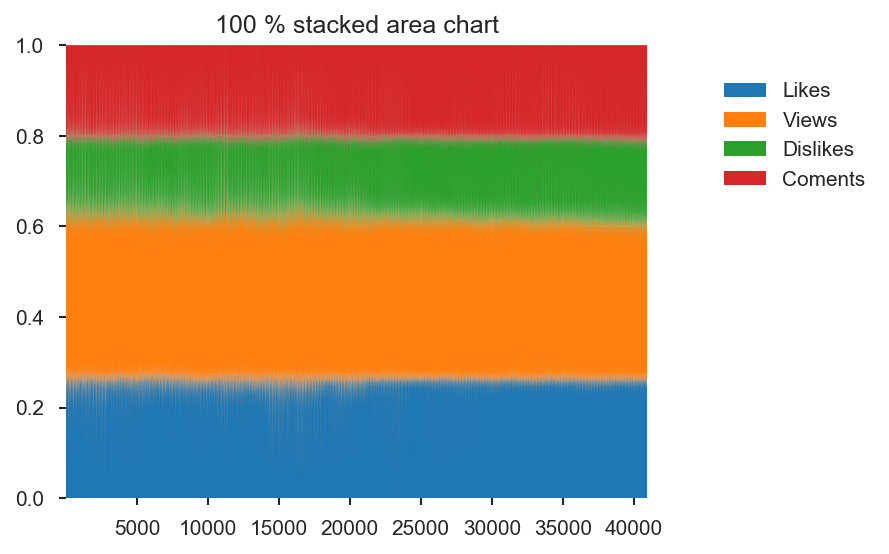

In [34]:
data_perc = vus22.divide(vus22.sum(axis=1), axis=0)
plt.figure(dpi=150,figsize=(5,4))
# Make the plot
plt.stackplot(range(1,40950),  data_perc["likes_log"],  data_perc["views_log"],  data_perc["dislikes_log"], data_perc["comment_log"], labels=['Likes','Views','Dislikes','Coments'])
plt.legend(loc='center left',bbox_to_anchor = (1.1,0.8))
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()

### 4. Stocked Area Chart 

In [35]:
# show the dataset
datapark = pd.read_csv('national_parks.csv')
# save the years in a variable x
x = datapark['Year']
#Y values
y = np.vstack([datapark['Badlands'], datapark['BryceCanyon']])
#Plotting labels
labels = ['Badlands', 'BryceCanyon']
#colors
colors= ['red', 'skyblue']

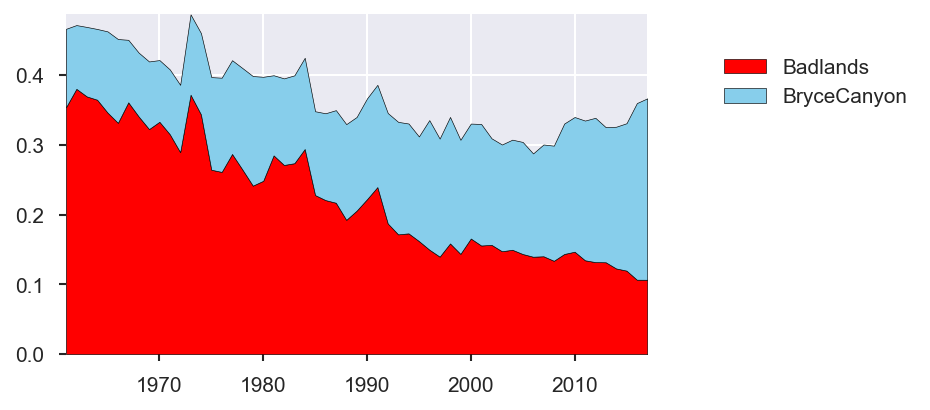

In [36]:
# size of the graph
plt.figure(figsize=(5,3), dpi=150)
#divide the data 
data_perc = datapark.divide(datapark.sum(axis=1), axis=0)
# show the graph
plt.stackplot(x,data_perc["Badlands"],data_perc["BryceCanyon"],edgecolor='black',
colors=colors,labels=labels)
plt.margins(0,0)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.8))
plt.show()

### 5. Pie Chart

In [37]:
#Reading DataSet
df= pd.read_csv('Extraccion_materiales.csv')
#Adding columns with total values
df['Total'] = (df['1990 – 1994'] + df['1995 – 1999'] + df['2000 – 2004'] + df['2005 – 2009'] + df['2010 – 2014'])


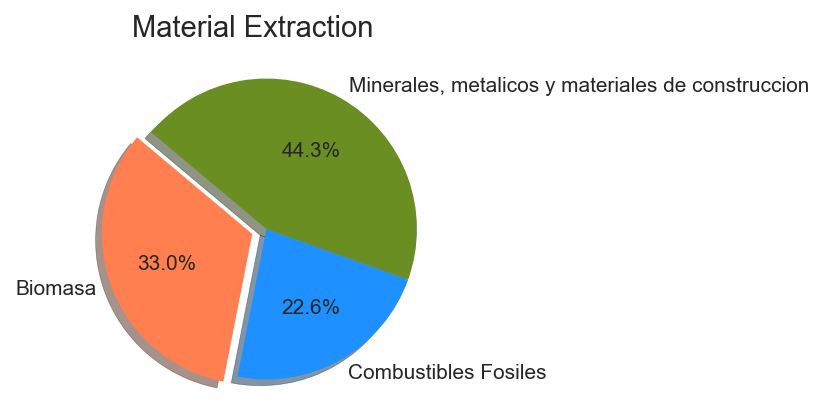

In [38]:
# Data to plot
plt.figure(dpi=150, figsize=(4,3))
#Labels taking from tipy of material
labels = df['TIPO_DE_MATERIAL']
sizes = df['Total']
colors = ['coral', 'dodgerblue', 'olivedrab']
explode = (0.1, 0, 0)  # explode 1st slice
# Plot
plt.suptitle('Material Extraction', fontsize=14)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

### 6. Waterfall Chart 
* Accumulation or Substraction to Total 
* Static

In [39]:
#Read csv
avocado = pd.read_csv("avocado.csv")
#Pivot de dataframe
avocado = avocado.pivot_table(index='year', columns='type', values='Total Bags')
#Delete organic
avocado=avocado.drop(['organic'], axis=1)
#Visualize conventional avocado amout of bags sold
C=avocado.conventional
#Cumulative sum
avocado.conventional.cumsum()
#Shift the data one place to the right.
avocadoC=avocado.conventional.cumsum().shift(1).fillna(0)
#Add a net total amount to the avocado and avocadoC(conventional) dataframe.
total = avocado.sum().conventional
avocado.loc["net"] = total
avocadoC.loc["net"] = total
#Create the steps we use to show the changes.
step = avocadoC.reset_index(drop=True).repeat(3).shift(-1)
step[1::3] = np.nan
#For the net row, we need to make sure the blank value is 0 so we don’t double stack.
avocadoC.loc["net"] = 0

Text(0, 0.5, 'Bags')

<Figure size 960x720 with 0 Axes>

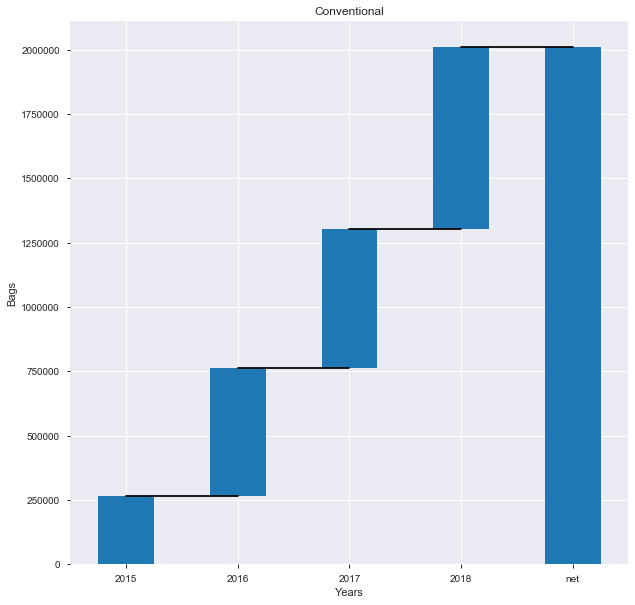

In [40]:
#Plotting
plt.figure(figsize=(8,6), dpi=120)
my_plot = avocado.plot(kind='bar', bottom=avocadoC,legend=None, title="Conventional", rot=0)
my_plot.plot(step.index, step.values, 'black')
my_plot.set_xlabel("Years")
my_plot.set_ylabel("Bags")

### 7. Stocked 100% Column Chart with Subcomponents  

In [41]:
#Reading dataset
scores = pd.read_csv("scores.csv")
#Droping nan values
scores.dropna(inplace=True)
#Reset index
scores.reset_index(inplace=True, drop=True)
#Chossing useful columns
scores = scores [["School Name","Percent White", "Percent Black", "Percent Hispanic", "Percent Asian"]]
#Renaming the columns
scores.columns = scores.columns.str.replace(" ", "_").str.lower()
#Changing the type
scores.percent_white = scores.percent_white.str.replace("%", "").astype(float)
scores.percent_black = scores.percent_black.str.replace("%", "").astype(float)
scores.percent_hispanic = scores.percent_hispanic.str.replace("%", "").astype(float)
scores.percent_asian = scores.percent_asian.str.replace("%", "").astype(float)
#Chossing only 4 elements
scores = scores.iloc[:4]


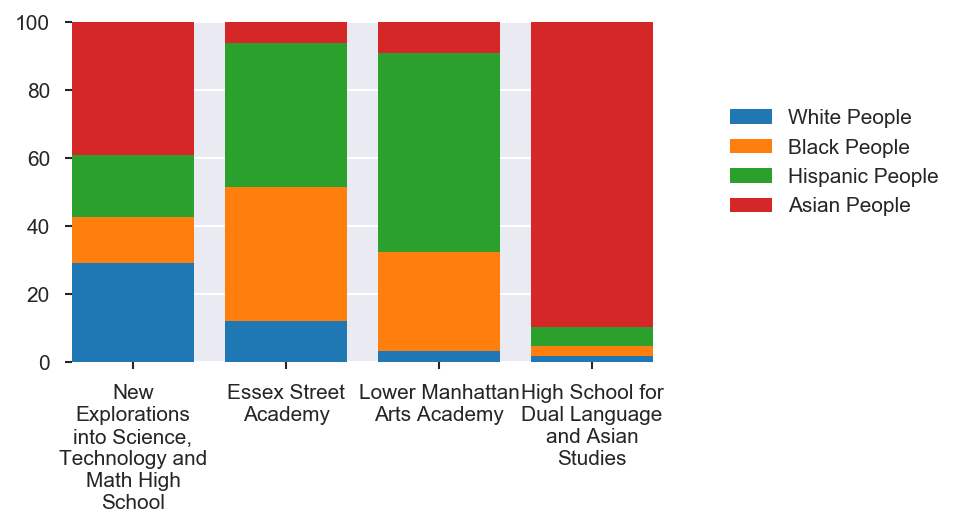

In [42]:
#Index
x = np.arange(len(scores.school_name))
#Y values in arrrays
y1= np.array(scores.percent_white)
y2=np.array(scores.percent_black)
y3 = np.array(scores.percent_hispanic)
y4 = np.array(scores.percent_asian)
#Total Elements
total = y1+y2+y3+y4
#Scaling to 100 all the elements
y1 = y1/total*100
y2 = y2/total*100
y3 = y3/total*100
y4 = y4/total*100
#Size of the figure
plt.figure(figsize=(5,3), dpi=150)
#Getting name to replace the index
names = scores.school_name
#replacing names
names = ['\n'.join(wrap(name, 15)) for name in names]
# stack bars
plt.bar(x, y1, label="White People")
plt.bar(x, y2 ,bottom=y1,label="Black People")
plt.bar(x, y3 ,bottom=y1+y2,label="Hispanic People")
plt.bar(x, y4, bottom = y1+y2+y3, label = "Asian People")
#Renaming the xticks
plt.xticks(x, names)
plt.margins(0,0)
#Fixing the legend
plt.legend(bbox_to_anchor = (1.1,0.8))
plt.show()

## Relationship 
* Two Variables
* Three Variables

### 1. Scatter Chart

In [43]:
# import our dataset of wine
file = 'wine.data'
datawin = pd.read_csv(file, names=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium',
                                   'Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins',
                                   'Color_intensity','Hue','OD280/OD315_of_diluted wines','Proline'])
# we use the variables necesary for the correlation matrix
wine_corr = datawin[['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium',
                                   'Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins',
                                   'Color_intensity','Hue','OD280/OD315_of_diluted wines','Proline']]

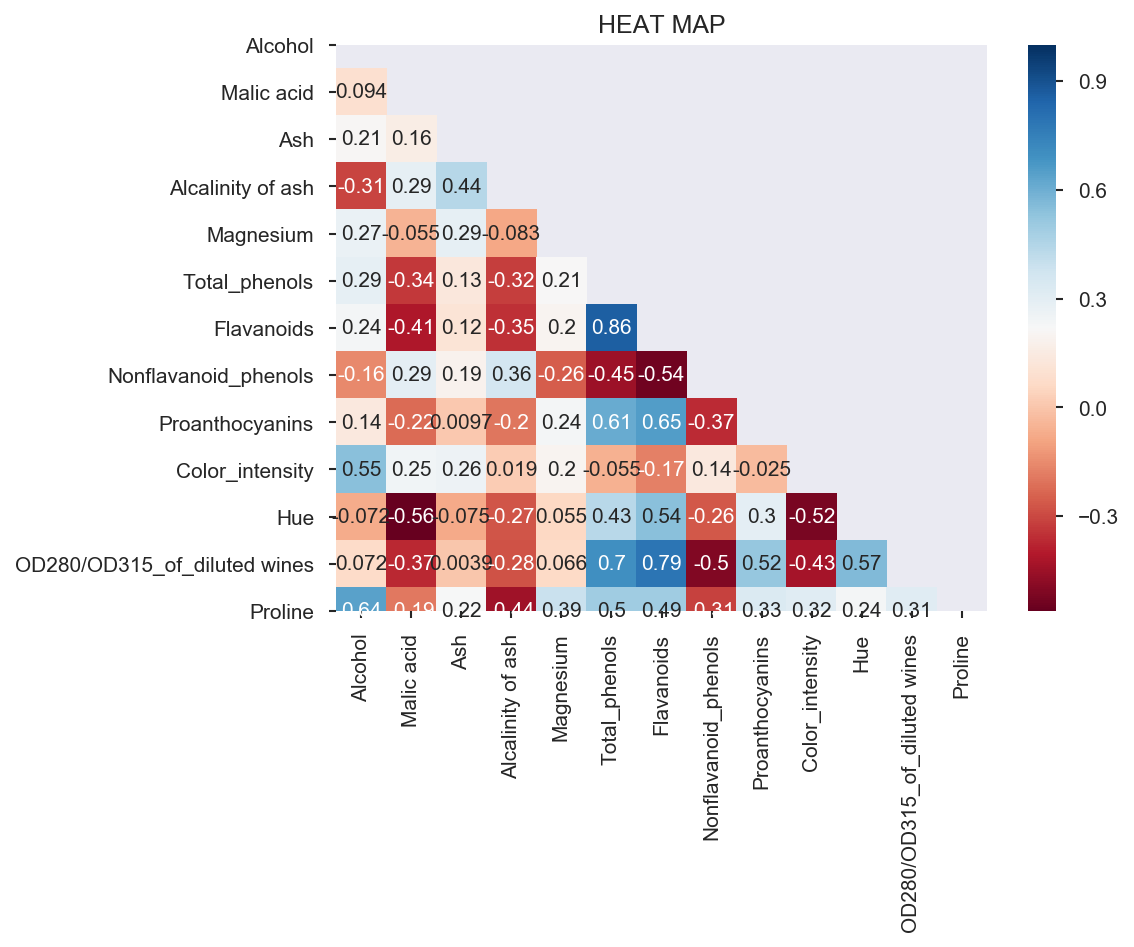

In [44]:
# correlation matrix
correlation_matrix = wine_corr.corr()

# heatmap
mask = np.zeros_like (correlation_matrix, dtype = np.bool) 
mask[np.triu_indices_from (mask)] = True 
plt.figure(figsize=(7,5), dpi=150)
sns.heatmap(correlation_matrix, annot = True, cmap = 'RdBu', mask=mask)
plt.title('HEAT MAP')
plt.show()

In the heat map we can see the variables that have a greater correlation, so it can help us to make a plot of dispersion between the variables that have a positive or negative correlation.

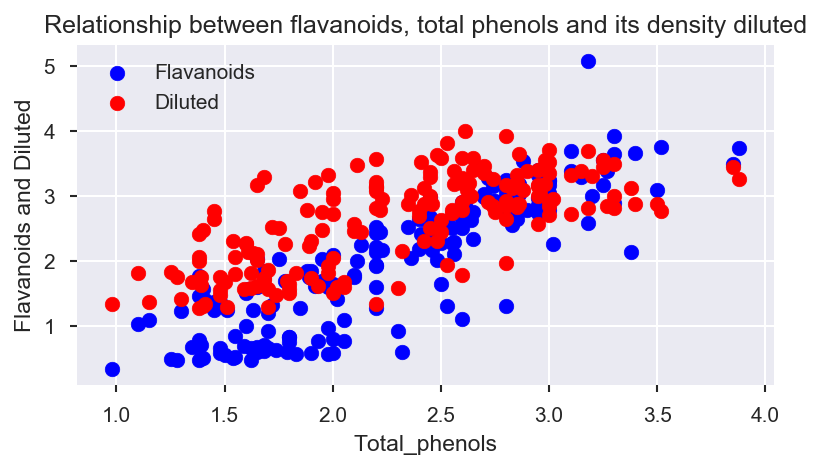

In [45]:
# show the graph 
plt.figure(figsize= (6,3), dpi = 150)
plt.scatter(datawin['Total_phenols'], datawin['Flavanoids'], label = "Flavanoids", color="blue")
plt.scatter(datawin['Total_phenols'], datawin['OD280/OD315_of_diluted wines'], label="Diluted", color ="red")
plt.title('Relationship between flavanoids, total phenols and its density diluted')
plt.xlabel('Total_phenols')
plt.legend(loc="upper left")
plt.ylabel('Flavanoids and Diluted')
plt.show()

### 2. Bubble Chart

In [46]:
#Reading DataSet
df= pd.read_csv('Extraccion_materiales.csv')
#Adding columns with total values
df['Total'] = (df['1990 – 1994'] + df['1995 – 1999'] + df['2000 – 2004'] + df['2005 – 2009'] + df['2010 – 2014'])

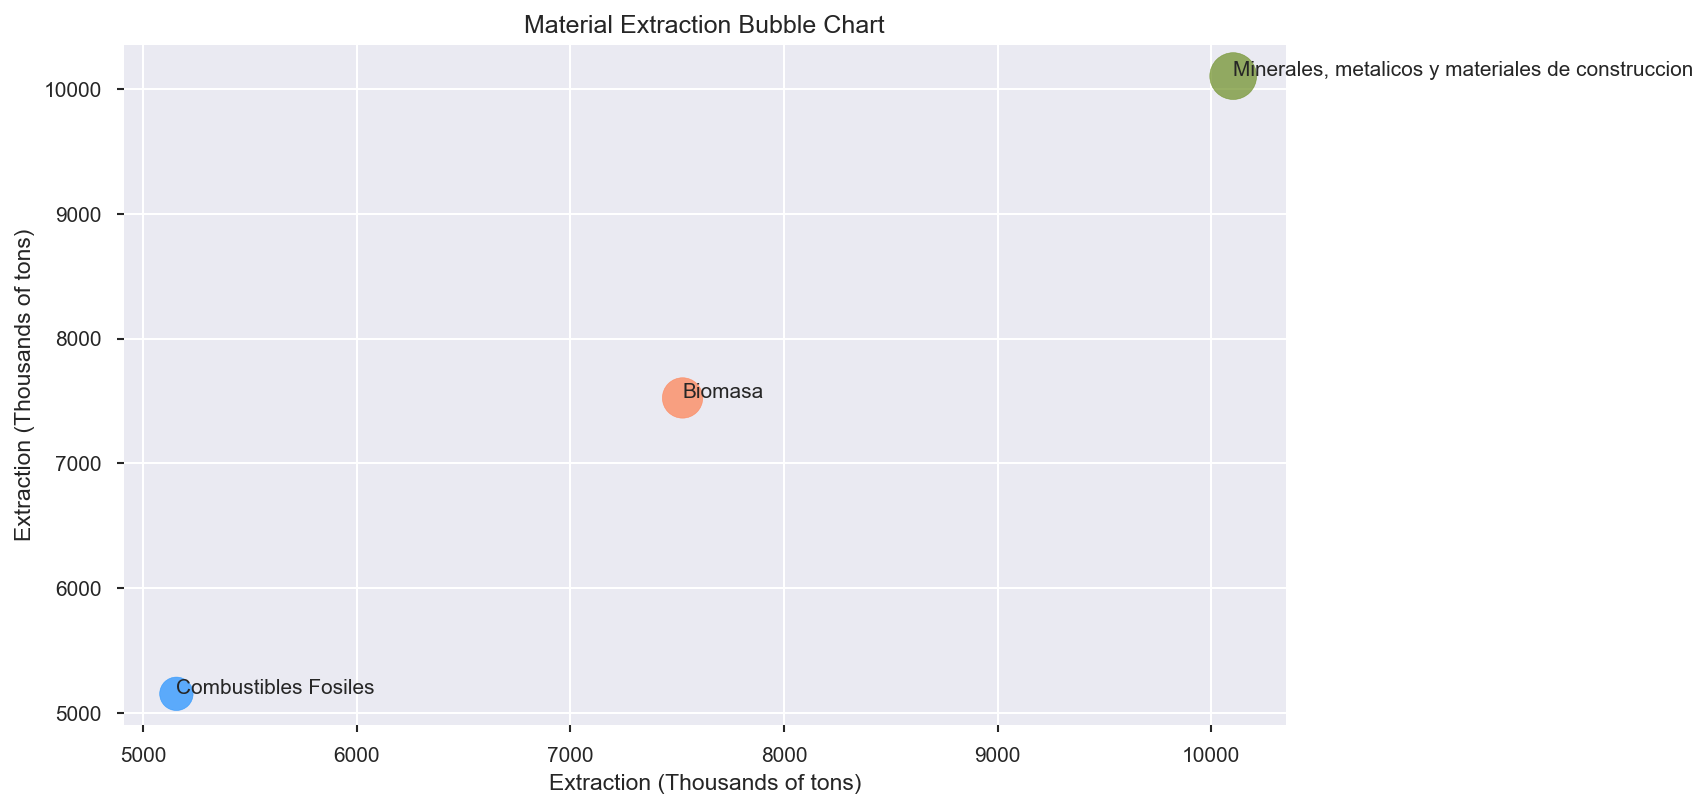

In [47]:
# create data
x = df['Total']
y = df['Total']
z = df['Total']
# Tags
plt.figure(figsize=(10,6), dpi=150)
#Title
plt.title('Material Extraction Bubble Chart')
#Labels
plt.xlabel('Extraction (Thousands of tons)')
plt.ylabel('Extraction (Thousands of tons)')

# use the scatter function
plt.scatter(x, y, s=z*0.05, color = colors, alpha=0.7)

# TO tags in the bubble
for i, txt in enumerate(df['TIPO_DE_MATERIAL']):
    
    plt.annotate(txt, (x[i],y[i]))

plt.show()